Иванов Денис 

ASB-10

Домашнее задание  # 1

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [4]:
data = pd.read_excel('авиаперелёты.xlsx')
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897


1.  Построить сводную таблицу: Airline/Source по столбцу Destination, и рассчитать - Среднюю стоимость билетов Price/Минимальную/Максимальную стоимость Price

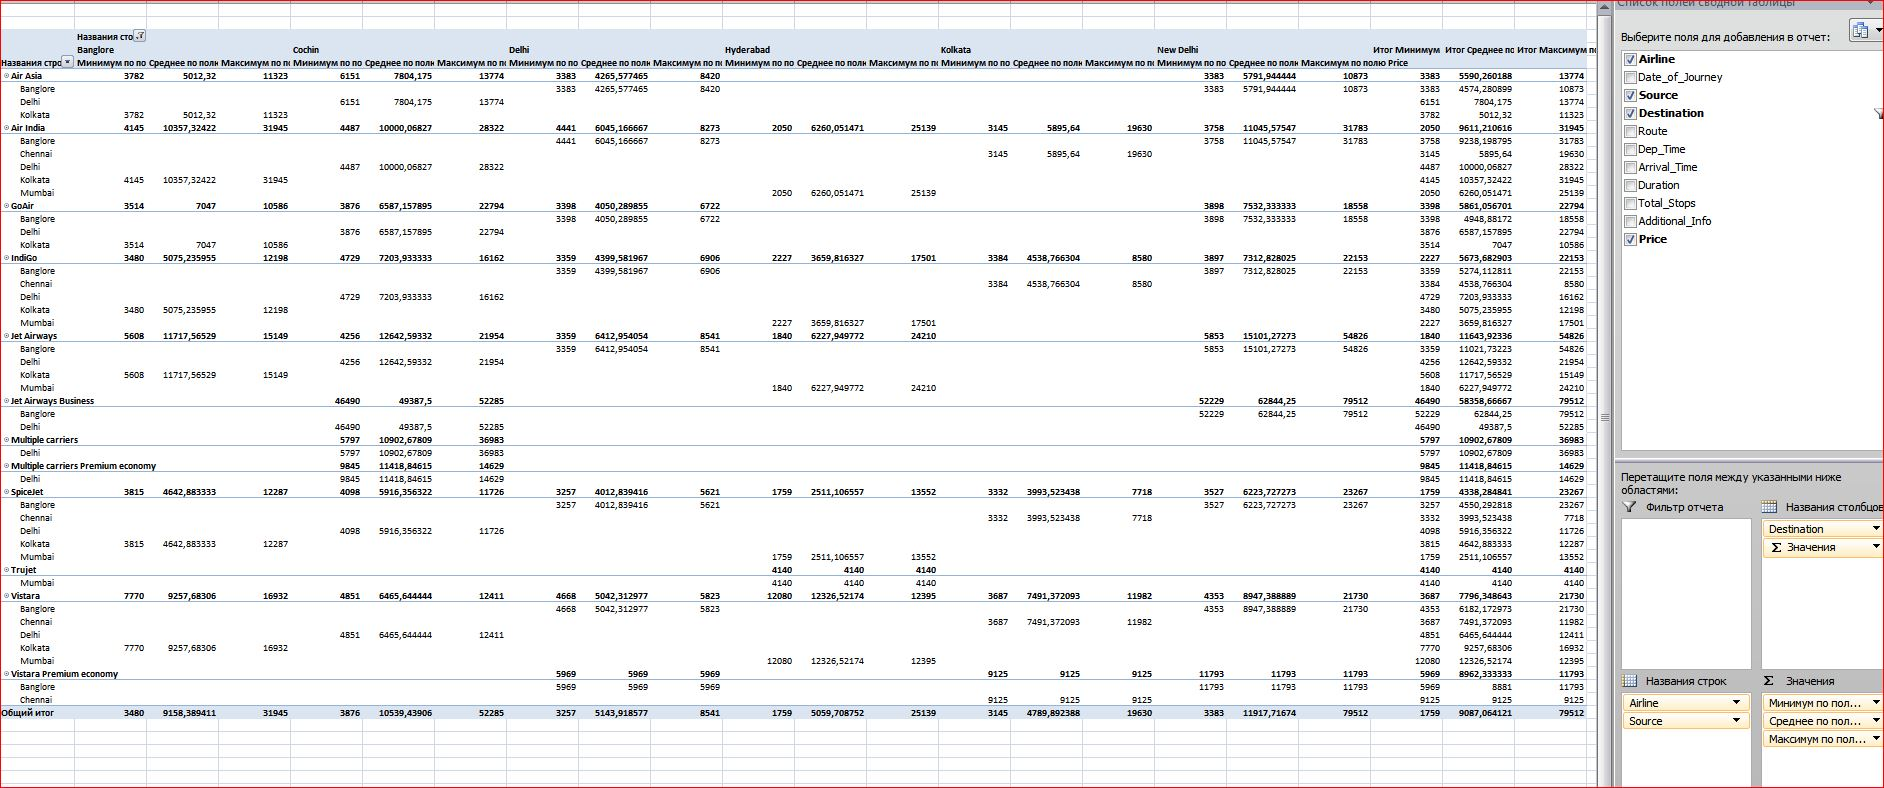

In [22]:
# Excell 
Image('Pivot_t_excell.jpg', width=1000)

In [18]:
# Pandas
table_01 = pd.pivot_table(data, 
                          values     =['Price'],  
                          index      = ['Airline', 'Source'],
                          columns    = ['Destination'], 
                          aggfunc    = [min, max, np.mean],
                          fill_value = '')
table_01.iloc[:, [0,6,12,1,7,13,2,8,14,3,9,15,4,10,16,5,11,17]]

min      max     mean    min  \
                                              Price    Price    Price  Price   
Destination                                Banglore Banglore Banglore Cochin   
Airline                           Source                                       
Air Asia                          Banglore                                     
                                  Delhi                                 6151   
                                  Kolkata      3782    11323  5012.32          
Air India                         Banglore                                     
                                  Chennai                                      
                                  Delhi                                 4487   
                                  Kolkata      4145    31945  10357.3          
                                  Mumbai                                       
GoAir                             Banglore                                     
                                  Delhi                                 3876   
                                  Kolkata      3514    10586     7047          
IndiGo                            Banglore                                     
                                  Chennai                                      
                                  Delhi                                 4729   
                                  Kolkata      3480    12198  5075.24          
                                  Mumbai                                       
Jet Airways                       Banglore                                     
                                  Delhi                                 4256   
                                  Kolkata      5608    15149  11717.6          
                                  Mumbai                                       
Jet Airways Business              Banglore                                     
                                  Delhi                                46490   
Multiple carriers                 Delhi                                 5797   
Multiple carriers Premium economy Delhi                                 9845   
SpiceJet                          Banglore                                     
                                  Chennai                                      
                                  Delhi                                 4098   
                                  Kolkata      3815    12287  4642.88          
                                  Mumbai                                       
Trujet                            Mumbai                                       
Vistara                           Banglore                                     
                                  Chennai                                      
                                  Delhi                                 4851   
                                  Kolkata      7770    16932  9257.68          
                                  Mumbai                                       
Vistara Premium economy           Banglore                                     
                                  Chennai                                      

                                              max     mean   min   max  \
                                            Price    Price Price Price   
Destination                                Cochin   Cochin Delhi Delhi   
Airline                           Source                                 
Air Asia                          Banglore                  3383  8420   
                                  Delhi     13774  7804.18               
                                  Kolkata                                
Air India                         Banglore                  4441  8273   
                                  Chennai                                
                                  Delhi     28322  10000.1               
                           

2.  Провести описательную статистику

In [14]:
# среднее значение, стандартное отклонение, квартили, медиана (квартиль 50%), минимум, максимум
data.describe().round(2)

,Price
count,10683.00
mean,9087.06
std,4611.36
min,1759.00
25%,5277.00
50%,8372.00
75%,12373.00
max,79512.00


In [29]:
print('Средняя по полю  Price', statistics.mean(data['Price']))
print('Медиана по полю  Price', statistics.median(data['Price']))
print('Мода    по полю  Price', statistics.mode(data['Price']))
print('Минимум по полю  Price',  min (data['Price']))
print('Максимум по полю Price', max (data['Price']))
print('Стандартное отклонение', statistics.pstdev(data['Price']))

Средняя по полю  Price 9087.064120565385
Медиана по полю  Price 8372
Мода    по полю  Price 10262
Минимум по полю  Price 1759
Максимум по полю Price 79512
Стандартное отклонение 4611.143334790283


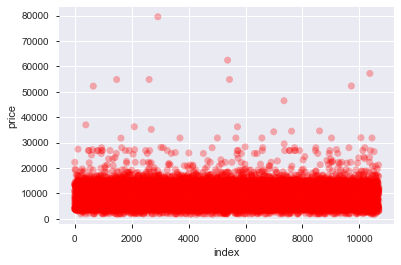

In [36]:
# Выбросы
price = data['Price']
ind = data.index
fig, ax = plt.subplots()
ax.scatter(ind, price,  c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('index')
plt.ylabel('price')
plt.show()

In [42]:
crit = [20000, 25000, 30000, 35000, 40000, 50000]
for i in crit:
    print ('Порог отсечения = ', i, 
           ',  выброс = ', (100*len(data[data['Price'] > i])/len(data)), '%')

Порог отсечения =  20000 ,  выброс =  1.3853786389590939 %
Порог отсечения =  25000 ,  выброс =  0.7675746513151737 %
Порог отсечения =  30000 ,  выброс =  0.2246559955068801 %
Порог отсечения =  35000 ,  выброс =  0.12168866423289339 %
Порог отсечения =  40000 ,  выброс =  0.08424599831508003 %
Порог отсечения =  50000 ,  выброс =  0.07488533183562669 %


3. Построить гистограмму распределения стоимостей (Price)

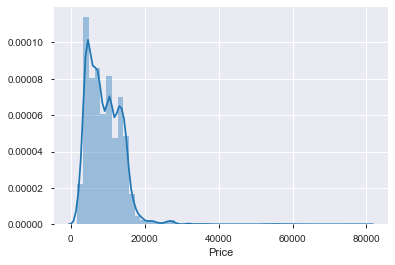

In [110]:
sns.distplot(data['Price'], label = 'Price')

4. Расчет персентилей и квартилей

In [44]:
# Персентили
data['Price'].quantile(np.linspace(.1, 1, 9, 0), 'lower')

0.1     3943
0.2     4823
0.3     6037
0.4     7189
0.5     8372
0.6    10203
0.7    11281
0.8    13039
0.9    14714
Name: Price, dtype: int64

In [96]:
# Квартили 
data['Price'].quantile(np.linspace(.25, 1, 3, 0), 'lower')

0.25     5277
0.50     8372
0.75    12373
Name: Price, dtype: int64